# <img src="ups.png">

### Nombre: Fanny Gutama
### Docente: Ing. Diego Quisi

## Regresion Probabilistico.


## Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [3]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2020-11-20,638230,282.0,786.0,1023.0,48.0,104.0,0.0,0.0,10110.0,...,213.0,0.0,0.0,315.0,4.0,1.0,0.0,3.0,70.0,65.0
326,2020-11-21,680229,232.0,836.0,1103.0,76.0,212.0,0.0,0.0,9592.0,...,209.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,23.0,74.0
327,2020-11-22,567244,154.0,737.0,1019.0,65.0,279.0,0.0,0.0,7143.0,...,0.0,0.0,0.0,352.0,1.0,0.0,0.0,3.0,21.0,52.0
328,2020-11-23,516058,252.0,565.0,1088.0,49.0,80.0,1.0,0.0,4181.0,...,337.0,0.0,0.0,818.0,0.0,0.0,0.0,6.0,30.0,48.0


In [5]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
325,324,996.0
326,325,594.0
327,326,1036.0
328,327,767.0


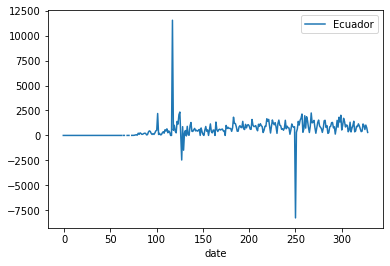

In [6]:
df.plot(x ='date', y='Ecuador')


Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.

In [7]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

666.5
704.3333333333334


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»

In [8]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
print(x)
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

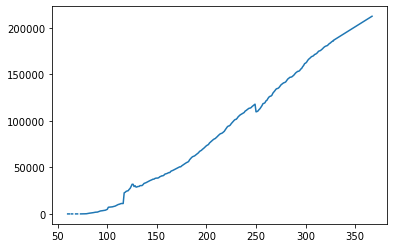

In [9]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+40):
    x.append(i)
    y.append(int(y[-1] + mediana))
prediccion=y[319]
plt.plot(x[61:], y[61:])
plt.show()

## Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.
Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

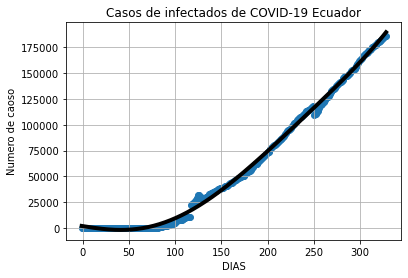

In [11]:
#Implementar
# Comparar el modelo de predicion matematico vs probabilidad.
from sklearn.preprocessing import PolynomialFeatures

x = list(df_t.iloc[:, 0]) 
y = list(df_t.iloc [:, 1]) 

y= np.nan_to_num(y)
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

poly = PolynomialFeatures(degree=5, include_bias=False)
x_poly = poly.fit_transform(x)

model = linear_model.LinearRegression()

model.fit(x_poly, y)
y_pred = model.predict(x_poly)
y_pred = y_pred-7
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.scatter(x, y)
plt.plot(x, y_pred, color='black',lw=4)
plt.grid(True)
plt.xlabel('DIAS')
plt.ylabel('Numero de caoso')
plt.show()

En mi punto de vista el modelo que mejor se ajusta es el polinomial ya que la curva presentada se adapta mejor al modelo mencionado.

In [14]:
#Probalistico
prediccion=prediccion-7
print(np.round(prediccion,1))

178660.0


In [15]:
#Polinomial
prediccionP=y_pred[319-7]
print(np.round(prediccionP,0))

[171292.]



Investigación Correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

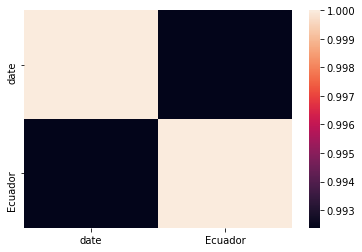

In [16]:
import seaborn as sns
correlacion = df_t.corr()
sns.heatmap(correlacion, xticklabels = correlacion.columns.values, yticklabels = correlacion.columns.values)

## Analisis

El modelo polinomial tiene menor datos verdaderos mientras que el probabilistico tiene una gran diferencia de moyor positvos.

## Conclusiones

Podemos concluir que el modelo probalistico posee mayor error al realizar la comparacion.

## Criterio personal (politico, economico y social de la situacion)

Lo politico juega un papel muy importante ya que de ellos depende de que el virus no se expanda por el pais, o de la organizacion al pais con sus debidas medias de precaucion para que no se expanda el virus ademas de el manejo corecto de los recursos para poder apoyar a todo la poblacion Ecuatoriana. Economicmente el pais esta atravesando una cris por la mala administracion y el poco interes que mostranron los politicos ante esta pandemia. En lo social mucha personas creo que recuperaron la humildad la humanidad de cada persona que es saber ayudar alos que mas necesitan de echo personas que no tiene ayudan a otras personas que no tenian nada. En la actualidad el desempleo incremento y muchas familias atraviesan una situacion terrible, debemos solodarnos con las personas y ayudar alos que no tiene, las personas del campo son las que estan estables economicamente gracias a su trabajo en la tierra.

##  Referencias

     * https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

     * https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/